# 第7章 支持向量机

1．支持向量机最简单的情况是线性可分支持向量机，或硬间隔支持向量机。构建它的条件是训练数据线性可分。其学习策略是最大间隔法。可以表示为凸二次规划问题，其原始最优化问题为

$$\min _{w, b} \frac{1}{2}\|w\|^{2}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right)-1 \geqslant 0, \quad i=1,2, \cdots, N$$

求得最优化问题的解为$w^*$，$b^*$，得到线性可分支持向量机，分离超平面是

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数是

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

最大间隔法中，函数间隔与几何间隔是重要的概念。

线性可分支持向量机的最优解存在且唯一。位于间隔边界上的实例点为**支持向量**。最优分离超平面由支持向量完全决定。
二次规划问题的对偶问题是
$$\min \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$\alpha_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

通常，通过求解对偶问题学习线性可分支持向量机，即首先求解对偶问题的最优值
 
$a^*$，然后求最优值$w^*$和$b^*$，得出分离超平面和分类决策函数。

2．现实中训练数据是线性可分的情形较少，训练数据往往是近似线性可分的，这时使用线性支持向量机，或软间隔支持向量机。线性支持向量机是最基本的支持向量机。

对于噪声或例外，通过引入松弛变量$\xi_{\mathrm{i}}$，使其“可分”，得到线性支持向量机学习的凸二次规划问题，其原始最优化问题是

$$\min _{w, b, \xi} \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N} \xi_{i}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right) \geqslant 1-\xi_{i}, \quad i=1,2, \cdots, N$$

$$\xi_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

常量C是 惩罚因子, 表示离群点的权重（用于控制“最大化间隔”和“保证大部分点的函数间隔小于1.0” ）
- $(label*(w^Tx+b) > 1) ,\quad \alpha = 0 $(在边界外，就是非支持向量)
- $(label*(w^Tx+b) = 1) ,\quad  0< \alpha < C $(在间隔边界上，就支持向量)
- $(label*(w^Tx+b) < 1) ,\quad  \alpha = C $(在间隔边界和分割超平面之间，是误差点 -> C表示它该受到的惩罚因子程度)

C值越大，表示离群点影响越大，就越容易过度拟合；反之有可能欠拟合。

求解原始最优化问题的解$w^*$和$b^*$，得到线性支持向量机，其分离超平面为

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数为

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

线性可分支持向量机的解$w^*$唯一但$b^*$不唯一。对偶问题是

$$\min _{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$0 \leqslant \alpha_{i} \leqslant C, \quad i=1,2, \cdots, N$$

线性支持向量机的对偶学习算法，首先求解对偶问题得到最优解$\alpha^*$，然后求原始问题最优解$w^*$和$b^*$，得出分离超平面和分类决策函数。

对偶问题的解$\alpha^*$中满$\alpha_{i}^{*}>0$的实例点$x_i$称为**支持向量**。支持向量可在间隔边界上，也可在间隔边界与分离超平面之间，或者在分离超平面误分一侧。最优分离超平面由支持向量完全决定。

线性支持向量机学习等价于最小化二阶范数正则化的**合页函数**

$$\sum_{i=1}^{N}\left[1-y_{i}\left(w \cdot x_{i}+b\right)\right]_{+}+\lambda\|w\|^{2}$$



3．非线性支持向量机

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间$\mathcal{X}$到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意x，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$

对称函数$K(x,z)$为正定核(positive kernel function)的充要条件如下：对任意$$\mathrm{x}_{\mathrm{i}} \in \mathcal{X}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}$$，任意正整数$m$，对称函数$K(x,z)$对应的Gram矩阵$K =[K(x_i, x_j)]_{m\times m}$是**半正定的**。

所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$




4．SMO算法

SMO算法是支持向量机学习的一种快速算法，其特点是不断地将原二次规划问题分解为只有两个变量的二次规划子问题，并对子问题进行解析求解，直到所有变量满足KKT条件为止。这样通过启发式的方法得到原二次规划问题的最优解。因为子问题有解析解，所以每次计算子问题都很快，虽然计算子问题次数很多，但在总体上还是高效的。

两个变量二次规划的求解方法:

- 选择2个变量$\alpha_1, \alpha_2$, 其他的$\alpha_i$是固定的, 那么子问题可以写成只含这两个变量的目标函数
- 由等式约束可以用其中一个变量$\alpha$的式子来表示另一个变量, 得到一个只含一个变量的目标函数
- 对只含一个变量的目标函数求导, 得到一个新的解(未经剪辑)
$$
\alpha_2^{new, unc} = \alpha_2^{old} + \frac {y_2(E_1 - E_2)}{\eta} \\ 
\eta = K_{11} + K_{22} - 2K_{12} = ||\phi(x_1) - \phi(x_2)||^2
$$, 然后根据不等式约束将其限制在区间$[L, H]$内, 
$$ 
L = max(0, \alpha_2^{old}- \alpha_1^{old}), \quad H=min(C, C+\alpha_2^{old}-\alpha_1^{old}),\quad if y1\neq y2 \\
 L = max(0, \alpha_2^{old}+\alpha_1^{old}-C), \quad H=min(C, \alpha_2^{old}+\alpha_1^{old}),\quad if y1=y2
$$
得到剪辑后的解
$$
\alpha_2^{new} = \begin{cases}H , \ \quad \alpha_2^{new, unc} > H \\
\alpha_2^{new, unc} , \ \quad  L\leq \alpha_2^{new, unc} \leq H \\
L, \ \quad \alpha_2^{new, unc} < L
\end{cases}
$$

- 再根据等式约束得到另一个变量的新的解$\alpha_1^{new} =\alpha_1^{old} + y_1y_2(\alpha_2^{old}- \alpha_2^{new})$

变量选择的方法:
- 第1个变量$\alpha_1$的选择: 外层循环, 在训练样本中选取违反KKT条件最严重的样本点, 并将其对应的$\alpha_i$选为第一个变量.具体地: 检验训练样本点$(x_i, y_i)$是否满足KKT条件, 即:
 * $\alpha_i = 0 \Leftrightarrow y_ig(x_i) \geq 1$ 间隔边界之外, 非支持向量
 * $ 0 < \alpha_i < C \Leftrightarrow y_ig(x_i) = 1$ 间隔边界上, 支持向量
 * $\alpha_i = C \Leftrightarrow y_ig(x_i) \leq 1$ 间隔边界与分离超平面之间, 误差点
 
 先搜寻间隔边界上的支持向量点, 再遍历整个训练集

- 第2个变量$\alpha_2$的选择: 内层循环, 标准是$\alpha_2$有足够大的变化<->$|E_1 - E_2|$最大($E_i$表示预测值与实际值的差, 可以将所有$E_i$保存下, 节省时间),

- 计算阈值b和差值$E_i$: 每次完成2个变量的优化后, 都要重新计算分离超平面的截距b和更新对应变量的$E_i$(选择支持向量的$\alpha$和$K$计算) 


----
分离超平面：$w^Tx+b=0$

点到直线距离：$r=\frac{|w^Tx+b|}{||w||_2}$

$||w||_2$为2-范数：$||w||_2=\sqrt[2]{\sum^m_{i=1}w_i^2}$

直线为超平面，样本可表示为：

$w^Tx+b\ \geq+1$

$w^Tx+b\ \leq+1$

#### margin：

**函数间隔**：$label(w^Tx+b)\ or\ y_i(w^Tx+b)$

**几何间隔**：$r=\frac{label(w^Tx+b)}{||w||_2}$，当数据被正确分类时，几何间隔就是点到超平面的距离

为了求几何间隔最大，SVM基本问题可以转化为求解:($\frac{r^*}{||w||}$为几何间隔，(${r^*}$为函数间隔)

$$\max\ \frac{r^*}{||w||}$$

$$(subject\ to)\ y_i({w^T}x_i+{b})\geq {r^*},\ i=1,2,..,m$$

分类点几何间隔最大，同时被正确分类。但这个方程并非凸函数求解，所以要先①将方程转化为凸函数，②用拉格朗日乘子法和KKT条件求解对偶问题。

①转化为凸函数：

先令${r^*}=1$，方便计算（参照衡量，不影响评价结果）

$$\max\ \frac{1}{||w||}$$

$$s.t.\ y_i({w^T}x_i+{b})\geq {1},\ i=1,2,..,m$$

再将$\max\ \frac{1}{||w||}$转化成$\min\ \frac{1}{2}||w||^2$求解凸函数，1/2是为了求导之后方便计算。

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ y_i(w^Tx_i+b)\geq 1,\ i=1,2,..,m$$

②用拉格朗日乘子法和KKT条件求解最优值：

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ -y_i(w^Tx_i+b)+1\leq 0,\ i=1,2,..,m$$

整合成：

$$L(w, b, \alpha) = \frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$$
它的KKT条件
$$\begin{cases}\alpha_i \geq 0 \\y_i(w^Tx_i+b) -1 \geq 0 \\ \alpha_i(y_i(w^Tx_i+b) -1)=0 \end{cases} $$

推导：$\min\ f(x)=\min \max\ L(w, b, \alpha)\geq \max \min\ L(w, b, \alpha)$

原始问题的最优化等价转化为对偶问题的最优化, 它的KKT
$$\begin{cases}\nabla_{w, b}L(w, b, \alpha)=0 \\y_i(w^Tx_i+b) -1 \geq 0; \\ \alpha_i \geq 0; \\ \alpha_i(y_i(w^Tx_i+b) -1)=0\end{cases}$$. 

根据KKT条件：

$$\frac{\partial }{\partial w}L(w, b, \alpha)=w-\sum\alpha_iy_ix_i=0,\ w=\sum\alpha_iy_ix_i$$

$$\frac{\partial }{\partial b}L(w, b, \alpha)=\sum\alpha_iy_i=0$$

代入$ L(w, b, \alpha)$

$\min\  L(w, b, \alpha)=\frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$

$\qquad\qquad\qquad=\frac{1}{2}w^Tw-\sum^m_{i=1}\alpha_iy_iw^Tx_i-b\sum^m_{i=1}\alpha_iy_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\frac{1}{2}w^T\sum\alpha_iy_ix_i-\sum^m_{i=1}\alpha_iy_iw^Tx_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\alpha_iy_iw^Tx_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)$

再把max问题转成min问题：

$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$

$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$

$ \alpha_i \geq 0,i=1,2,...,m$

以上为SVM对偶问题的对偶形式

-----
#### kernel trick

在低维空间计算获得高维空间的计算结果，也就是说计算结果满足高维（满足高维，才能说明高维下线性可分）。  
想法: 直接计算$K(x, z)$, 通过映射$\phi(x)$计算较困难且映射不唯一.

核具有再生性即满足 $$ K(\cdot,x)\cdot f=f(x)\\ K(\cdot,x)\cdot K(\cdot, z)=K(x,z) $$ 称为再生核

---
#### soft margin & slack variable

引入松弛变量$\xi\geq0$，对应数据点允许偏离的functional margin 的量。

目标函数：

$$\min\ \frac{1}{2}||w||^2+C\sum\xi_i\qquad s.t.\ y_i(w^Tx_i+b)\geq1-\xi_i$$ 

对偶问题：

$$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$$

$$s.t.\ C\geq\alpha_i \geq 0,i=1,2,...,m\quad \sum^m_{i=1}\alpha_iy_i=0,$$

-----

#### Sequential Minimal Optimization

首先定义特征到结果的输出函数：$u=w^Tx+b$.

因为$w=\sum\alpha_iy_ix_i$

有$u=\sum y_i\alpha_iK(x_i, x)-b$


----

$$\max \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\sum^m_{j=1}\alpha_i\alpha_jy_iy_j<\phi(x_i)^T,\phi(x_j)>$$

$$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$$

$$ \alpha_i \geq 0,i=1,2,...,m$$

-----
参考资料：

[1] :[Lagrange Multiplier and KKT](http://blog.csdn.net/xianlingmao/article/details/7919597)

[2] :[推导SVM](https://my.oschina.net/dfsj66011/blog/517766)

[3] :[机器学习算法实践-支持向量机(SVM)算法原理](http://pytlab.org/2017/08/15/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%AE%97%E6%B3%95%E5%AE%9E%E8%B7%B5-%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA-SVM-%E7%AE%97%E6%B3%95%E5%8E%9F%E7%90%86/)

[4] :[Python实现SVM](http://blog.csdn.net/wds2006sdo/article/details/53156589)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

----

In [4]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear', C=1.0, gamma='auto', verbose=True):
        self.max_iter = max_iter
        self._kernel = kernel
        # 惩罚项系数
        self.C = C
        self.gamma = gamma
        # 进行简化处理
        self.verbose = verbose

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        elif self.alpha[i] == self.C:
            return y_g <= 1
        else:
            return False

    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        # g(x_i) = \sum_j \alpha_j y_j K(x_i, x_j)
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    # 核函数
    def kernel(self, x1, x2):
        # x1, x2 单个样本点x
        if self._kernel == 'linear':
            return np.inner(x1, x2)  # 
            # return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (np.inner(x1, x2) + 1) ** 2
            # return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2
        elif self._kernel == 'rbf':
            if self.gamma == 'auto':
                gamma = 1 / self.n  # 默认 1/n_features
            else:
                gamma = self.gamma
            x = x1 - x2
            return np.exp(-gamma * np.inner(x, x))
        return 0

    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue
            
            # 选择违反KKT条件的变量
            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = np.argmin(self.E)
                # j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = np.argmax(self.E)
                # j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            # train
            # 选择两个变量
            i1, i2 = self._init_alpha()

            # 确定 alpha的边界 [L, H]
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])
            
            if L == H:
                if self.verbose:
                    print("L==H")
                continue
            
            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                print('eta <= 0')
                continue
            
            # 计算新的alpha2
            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (
                E1 - E2) / eta  #此处有修改，根据书上应该是E1 - E2，书上130-131页
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            
            if abs(alpha2_new - self.alpha[i2]) < 0.00001:
                if self.verbose:
                    print("alpha not moving enough")
                continue
                
            # 得到 新的alpha1
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)
            
            # 阈值b
            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b
            
            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2

            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])
        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

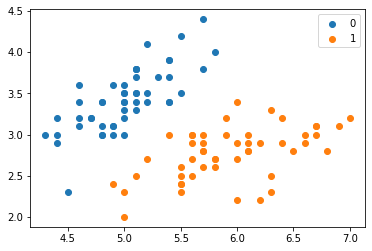

In [5]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [6]:
svm = SVM(max_iter=200, kernel='linear')

In [7]:
svm.fit(X_train, y_train)

L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H
L==H


'train done!'

In [8]:
svm.score(X_test, y_test)

0.8

In [9]:
svm.score(X_train, y_train)

0.8533333333333334

In [10]:
y_preds = []
for x in X_test:
    y_preds.append(svm.predict(x))
y_preds = np.array(y_preds)
y_preds

array([-1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1])

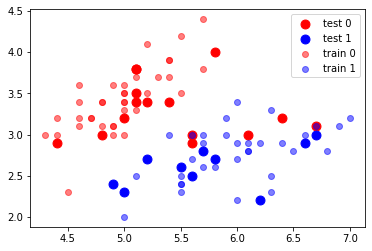

In [11]:
def line_(clf, x):
    return -(clf._weight()[0]*x+clf.b)/ clf._weight()[1]
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# plt.plot([x_min, x_max], [line_(svm, x_min), line_(svm, x_max)])
plt.scatter(X_test[y_preds==-1][:, 0], X_test[y_preds==-1][:, 1], c='r', s=80, label='test 0')
plt.scatter(X_test[y_preds==1][:, 0], X_test[y_preds==1][:, 1], c='b', s=80, label='test 1')
plt.scatter(X_train[y_train==-1][:, 0],X_train[y_train==-1][:, 1], c='r', alpha=.5, label='train 0')
plt.scatter(X_train[y_train==1][:, 0],X_train[y_train==1][:, 1],  c='b', alpha=.5, label='train 1')
plt.legend()

### scikit-learn实例

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')  # 选择线性核
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
clf.score(X_test, y_test)

1.0

In [14]:
clf.intercept_

array([-7.0018747])

In [15]:
clf.coef_

array([[ 2.28629496, -1.71471675]])

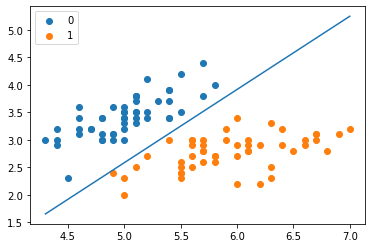

In [16]:
def line_(clf, x):
    return -(clf.coef_[0, 0]*x+clf.intercept_)/ clf.coef_[0, 1]
x_min, x_max = X[:, 0].min(), X[:, 0].max()
plt.plot([x_min, x_max], [line_(clf, x_min), line_(clf, x_max)])
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [17]:
# 查看支持向量的下标
clf.support_

array([ 0,  1,  5, 25, 40, 57, 60,  3,  8,  9, 15, 32, 36, 41],
      dtype=int32)

In [18]:
# 查看每个分类的支持向量数
clf.n_support_

array([7, 7], dtype=int32)

In [26]:
def plot_decision_regions(X, y, clf, resolution=0.01):
    x1_max, x1_min = X[:, 0].max(), X[:, 0].min()
    x2_max, x2_min = X[:, 1].max(), X[:, 1].min()
    # 生成二维网格
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # 每个网格点的预测值
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 转成网格形式
    z = z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
    
    plt.scatter(X[:50,0],X[:50,1], label='0')
    plt.scatter(X[50:,0],X[50:,1], label='1')
    plt.legend()

    
#     xmin, xmax = plt.xlim()
#     ymin, ymax = plt.ylim()
#     coef = clf.coef_[0]
#     intercept = clf.intercept_
#     def line_(x):
#         return -(x*coef[0] + intercept) / coef[1]
#     plt.plot([xmin, xmax], [line_(xmin), line_(xmax)])
    plt.show()

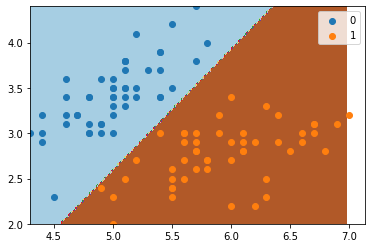

In [27]:
plot_decision_regions(X, y, clf, 0.02)


----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)